In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.optimize import root,bisect
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, Math, Latex

In [2]:
sns.set_style('white')

## Яма с бесконечными стенками
Потенциал задается $$E_{nl} = \frac{\hbar^2}{2ma^2}\beta_{nl}^2,$$
где $\beta_{nl}$ -  $n$-тый ноль $l$-той сферической функций Бесселя $j_n(x) = (-x)^n\bigg(\frac{1}{x} \frac{d}{dx}\bigg)^n \frac{\sin{x}}{x}$

Нули известны:

| |n=1|n=2|n=3|n=4|
| :-- | :--: | :--: | :---: | :--:
|l=0|3.142|6.283|9.425|12.566|
|l=1|4.493 | 7.725 | 10.904| 14.066
|l=2|5.763 | 9.095 | 12.323 | 15.515
|l=3|6.988 | 10.417 | 13.698 | 16.924
|l=4|8.183 | 11.705 | 15.040 | 18.301

Перейдем в атомарные едеиницы: $\hbar = 1, m = 1, a = 5~ a. u.$

Найдем численные решения для различных значений $l$ и $n$.

In [3]:
#создаем массив из нулей сферич. функций Бесселя
n = 5
A = [] 
for i in range(n): 
    A.append(list(map(float, input().split())))

3.142	6.283	9.425	12.566
4.493	7.725	10.904	14.066
5.763	9.095	12.323	15.515
6.988	10.417	13.698	16.924
8.183	11.705	15.040	18.301


In [5]:
Arr =  np.asarray(A)

In [8]:
a=5
E = Arr**2 / (2.0*a**2)
#print (E)
df = pd.DataFrame(E)
df.columns = [r"$n=1$",r"$n=2$",r"$n=3$",r"$n=4$"]

#print (df.to_latex())

In [9]:
#соответствующие значения энергии
df

,$n=1$,$n=2$,$n=3$,$n=4$
0,0.197443,0.789522,1.776613,3.158087
1,0.403741,1.193512,2.377944,3.957047
2,0.664243,1.654381,3.037127,4.814305
3,0.976643,2.170278,3.752704,5.728436
4,1.339230,2.740140,4.524032,6.698532


## Яма с конечными стенками


В случае $l=0$ для вычисления спектра имеет место следующая формула:
$$\tan \bigg(\frac{2mV_0}{\hbar^2}a\sqrt{1-\frac{|E|}{V_0}}\bigg)=-\sqrt{\frac{|E|}{V_0}-1}$$
Перенесем все в одну часть, и положим $a=5, m=1, \hbar=1, V_0 =10$

In [10]:
V_0=10.0
a=5.0
def f(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))+np.sqrt(V_0/x-1)

(-20, 20)

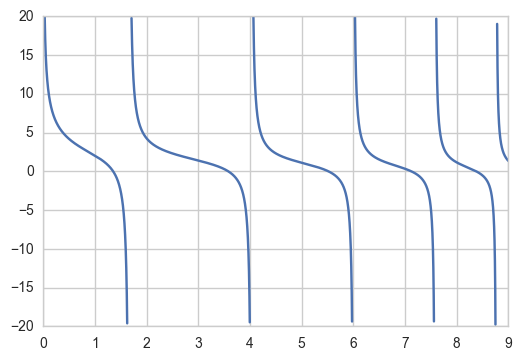

In [11]:
xx = np.linspace(0,9,10000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
#plt.plot(ens[ens<=4],np.zeros_like(ens[ens<=4]),'o')
plt.grid(True)
plt.ylim([-20,20])

In [12]:
def f1(x):
    return np.tan(a*np.sqrt(2)*np.sqrt(V_0 - x))

def f2(x):
    return -np.sqrt(V_0/x-1)

In [13]:
print(plt.style.available)

['seaborn-deep', 'seaborn-pastel', 'ggplot', 'seaborn-white', 'seaborn-talk', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn-poster', 'bmh', 'seaborn-muted', 'classic', 'grayscale', 'seaborn-colorblind', 'seaborn-dark-palette', 'dark_background', 'seaborn-dark', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-paper']


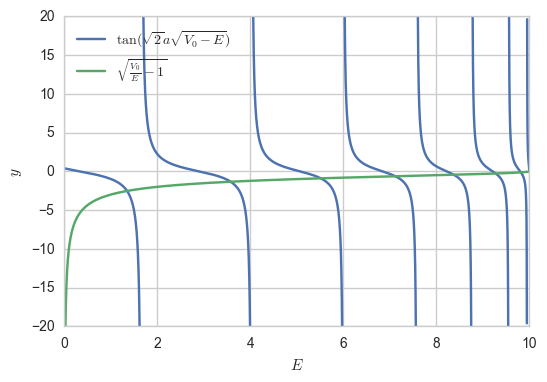

In [25]:
xx = np.linspace(0,10.0,100000)
yy1 = f1(xx)
yy2 = f2(xx)
yy1[yy1>20] = np.inf
yy1[yy1<-20] = np.inf
yy2[yy2>20] = np.inf
yy2[yy2<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy1,label=r'$\tan(\sqrt{2} a \sqrt{V_0-E})$')
plt.plot(xx,yy2,label=r'$\sqrt{\frac{V_0}{E}-1}$')
#plt.plot(ens[ens<=10.0],f1(ens[ens<=10.0]),'o')
plt.legend(loc='best')
plt.ylim([-20,20])
#plt.grid(True)
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')
plt.savefig('tan-sqrt.pdf')

In [15]:
print (root(f,1.0).x)

[ 1.3500333]


In [17]:
x0 = np.arange(0.01,V_0,step=0.1)

In [18]:
ens = []
for step in x0:
    ens.append(root(f,step).x[0])

In [19]:
ens = (np.asarray((list((set(ens))))))

In [20]:
ens.sort()
print (ens)

[ 1.3500333   1.3500333   1.3500333   1.3500333   1.3500333   1.3500333
  1.3500333   1.3500333   1.3500333   1.3500333   1.3500333   1.3500333
  1.3500333   1.3500333   3.57753041  3.57753041  3.57753041  3.57753041
  3.57753041  3.57753041  3.57753041  3.57753041  3.57753041  3.57753041
  3.57753041  3.57753041  3.57753041  3.57753041  5.5154647   5.5154647
  5.5154647   5.5154647   5.5154647   5.5154647   5.5154647   5.5154647
  5.5154647   5.5154647   7.12004505  7.12004505  7.12004505  7.12004505
  7.12004505  7.12004505  7.12004505  8.37638025  8.37638025  8.37638025
  8.37638025  8.37638025  8.37638025  8.37638025  9.27735356  9.27735356
  9.27735356  9.27735356  9.27735356  9.81919275  9.81919275  9.81919275
  9.81919275]


In [21]:
counter = 0
while(counter < 10):
    ind = []
    for i in range(1,ens.shape[0]):        
        if (np.abs(ens[i]-ens[i-1]) < 1e-5):
            ind.append(i)
    print (ind)
    ens = np.delete(ens,np.asarray(ind))
    counter+=1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [22]:
print (ens)

[ 1.3500333   3.57753041  5.5154647   7.12004505  8.37638025  9.27735356
  9.81919275]


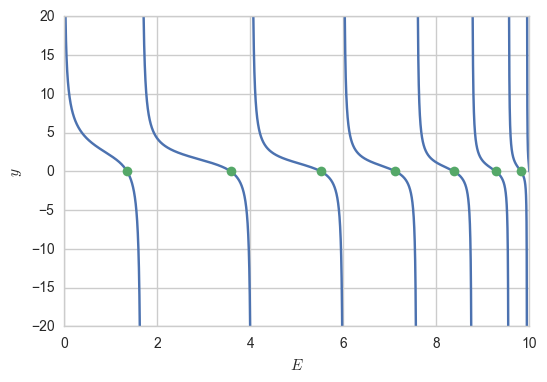

In [23]:
xx = np.linspace(0,10.0,1000000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
plt.plot(ens[ens<=10.0],np.zeros_like(ens[ens<=10.0]),'o')
plt.grid(True)
plt.ylim([-20,20])
plt.xlabel(r'$E$')
plt.ylabel(r'$y$')
plt.savefig('finite_well.pdf')

In [26]:
from numpy import vectorize

In [27]:
def potential(x):
    if (np.abs(x)<a):
        return -V_0
    else:
        return 0
    
potential = vectorize(potential)

In [28]:
x = np.linspace(-15,15,500)
xs = np.linspace(-5,5,500)
y = potential(x)

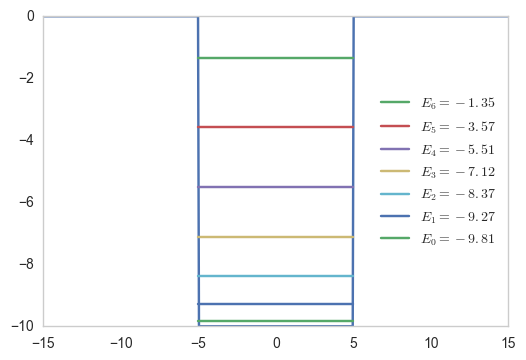

In [29]:
plt.plot(x,y)
for i in range(ens.shape[0]):
    plt.plot(xs,-np.ones_like(xs)*ens[i],label=r"$E_"+str(6-i)+"="+str(-ens[i])[:5]+"$")
    
plt.legend(loc='right')
plt.grid(False)
plt.savefig('ens_finite.pdf')

In [30]:
def wv_in(k,r):
    return np.sinc(k*r/np.pi) * k

In [31]:
def wv_out(k,r):
    return (-1.0j)*np.exp(-k*r)/r

In [32]:
print (a)

5.0


In [33]:
ksq = 2*(10.0 - ens)
kappasq = 2*(ens)

In [34]:
ind = 1

In [35]:
print (ksq[-ind])
print (kappasq[-ind])

0.361614493923
19.6383855061


In [37]:
B = (wv_in(np.sqrt(ksq[-ind]),a)/wv_out(np.sqrt(kappasq[-ind]),a))

In [38]:
print (B)

(-0+564332741.542j)


In [39]:
N = 200
x = np.linspace(-10,10,N)
h = x[1]-x[0]
xx,yy = np.meshgrid(x,x)
z = np.zeros((N,N),dtype=np.complex128)
rs = np.sqrt(xx**2+yy**2)
for i in range(N):
    for j in range(N):
        if(xx[i,j]**2+yy[i,j]**2 <= a**2):

            z[i,j] = (wv_in(np.sqrt(ksq[-ind]),rs[i,j]))
        else:
            z[i,j] = B*((wv_out(np.sqrt(kappasq[-ind]),rs[i,j])))
            


In [40]:
integr = np.sum(np.abs(z)**2)*h**2

z = np.abs(z)**2/integr

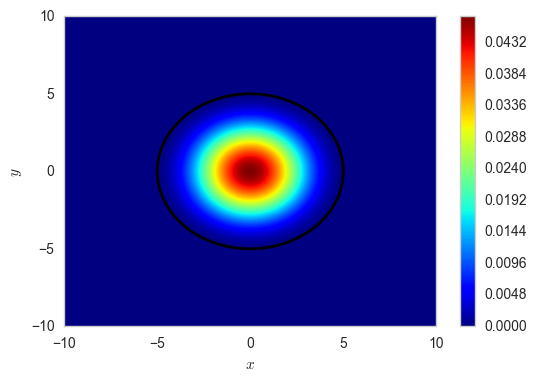

In [41]:
from matplotlib import cm
ax = plt.gca()
circle1 = plt.Circle((0, 0), 5, color='black',fill=False,lw=2)
plt.contourf(xx,yy,z,500,cmap=cm.jet)
ax.add_artist(circle1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(False)
plt.colorbar()
plt.savefig('finite_3.pdf')

In [42]:
from mpl_toolkits.mplot3d import Axes3D

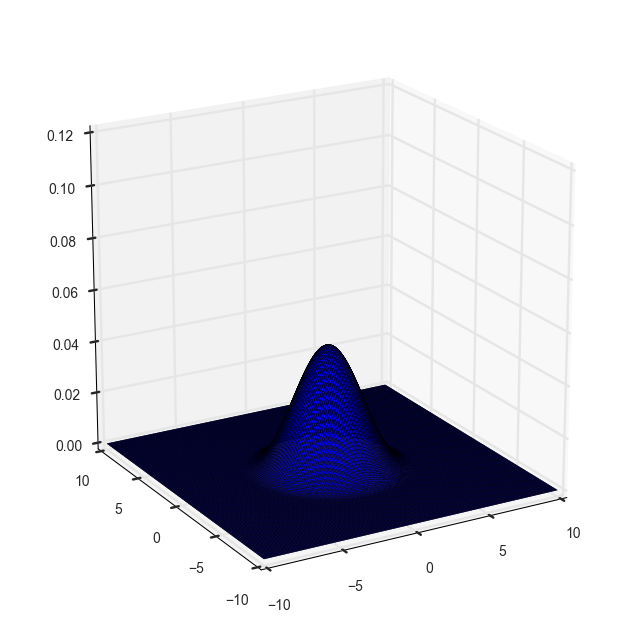

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.plot_surface(xx, yy, z, rstride = 1, cstride = 1)
ax.view_init(20, -120) 
ax.auto_scale_xyz([-10, 10], [-10, 10], [0, 0.1])
plt.show()